In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

from sklearn.decomposition import PCA # 주성분 분석
from sklearn.preprocessing import StandardScaler # 표준화
from scipy.spatial.distance import pdist, squareform
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree
from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN
from factor_analyzer import FactorAnalyzer

### Matrix Decomposition practice

In [2]:
data_1 = pd.DataFrame({"x1":[2,0,0], "x2":[0,4,3], "x3":[0,3,-4]})
data_1

,x1,x2,x3
0,2,0,0
1,0,4,3
2,0,3,-4


In [3]:
data_2 = np.array([[2,0,-1],[0,1,0]])
data_2

array([[ 2,  0, -1],
       [ 0,  1,  0]])

In [4]:
pca = PCA().fit(data_1)
pca.explained_variance_

array([1.25000000e+01, 5.50000000e+00, 9.42881103e-65])

In [5]:
pca.explained_variance_ratio_

array([6.94444444e-01, 3.05555556e-01, 5.23822835e-66])

In [6]:
pca.components_[0]

array([ 2.11471052e-17, -1.41421356e-01, -9.89949494e-01])

In [7]:
X_scale = np.array([[ 1.41421356, -1.37281295, -1.37281295],
        [-0.70710678,  0.98058068,  0.39223227],
        [-0.70710678,  0.39223227,  0.98058068]])

In [8]:
np.matmul(X_scale, pca.components_[0])

array([ 1.55316055, -0.52696519, -1.02619537])

In [9]:
x_reduced = pca.transform(data_1)
x_reduced[2]

array([ 3.53553391e+00, -1.35400640e+00, -2.22044605e-16])

In [10]:
data_2 = pd.DataFrame({"x1":[2,0], "x2":[0,1], "x3":[-1,0]})
data_2

,x1,x2,x3
0,2,0,-1
1,0,1,0


In [11]:
np.matmul(np.array([[2,0,0],[0,4,3],[0,3,-4]]),np.array([[2,0,0],[0,4,3],[0,3,-4]]))

array([[ 4,  0,  0],
       [ 0, 25,  0],
       [ 0,  0, 25]])

### Midtrem Exam

1. La Quinta Motor Inns은 전미에 위치한 business traveler를 위한 모텔 체인이다. 이 회사는 최근에 시장 점유율을 늘리기 위해 새로운 모텔을 지으려 한다. 회사의 매니저는 이익에 영향을 주는 요소를 파악하여 새 모텔을 짓기에 적절한 지역을 예측하기 위해 100개의 La Quinta 모텔을 무작위로 선정하여 아래의 변수들을 수집하였다. 데이터는 `laquinta1.csv`에 있다.  

|변수명   |내용   |
|---|---|
|  Margin |  operating margin (%) |
| Number  |  해당 모텔의 3 마일 반경 안에 있는 모텔이나 호텔 방의 수|
| Nearest  | 가장 가까운 경쟁 모텔 혹은 호텔 과의 거리 (in miles)  |
| Office_Space  | 커뮤니티에 있는 사무실 규모 (in 1000 ft^2)  |
| Enrollment | 근처 대학의 등록자 수 (in 1000명) | 
| Income | 커뮤니티의 중위소득 (in $1000) | 
| Distance | 시내 중심까지의 거리 (in miles)|

In [12]:
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import OLSInfluence
import matplotlib.pyplot as plt
import statsmodels.api as sm

a.	자료 간의 산점도 행렬과 상관계수 행렬을 프린트 하시오. Margin과 가장 선형상관관계가 강한 변수는 무엇인가? 가장 약한 변수는 무엇인가? 

In [14]:
data_path = './data/'
data = pd.read_csv(data_path + 'laquinta.csv')
data.head()

,Margin,Number,Nearest,Office_Space,Enrollment,Income,Distance
0,55.5,3203,4.2,549,8.0,37,2.7
1,33.8,2810,2.8,496,17.5,35,14.4
2,49.0,2890,2.4,254,20.0,35,2.6
3,31.9,3422,3.3,434,15.5,38,12.1
4,57.4,2687,0.9,678,15.5,42,6.9


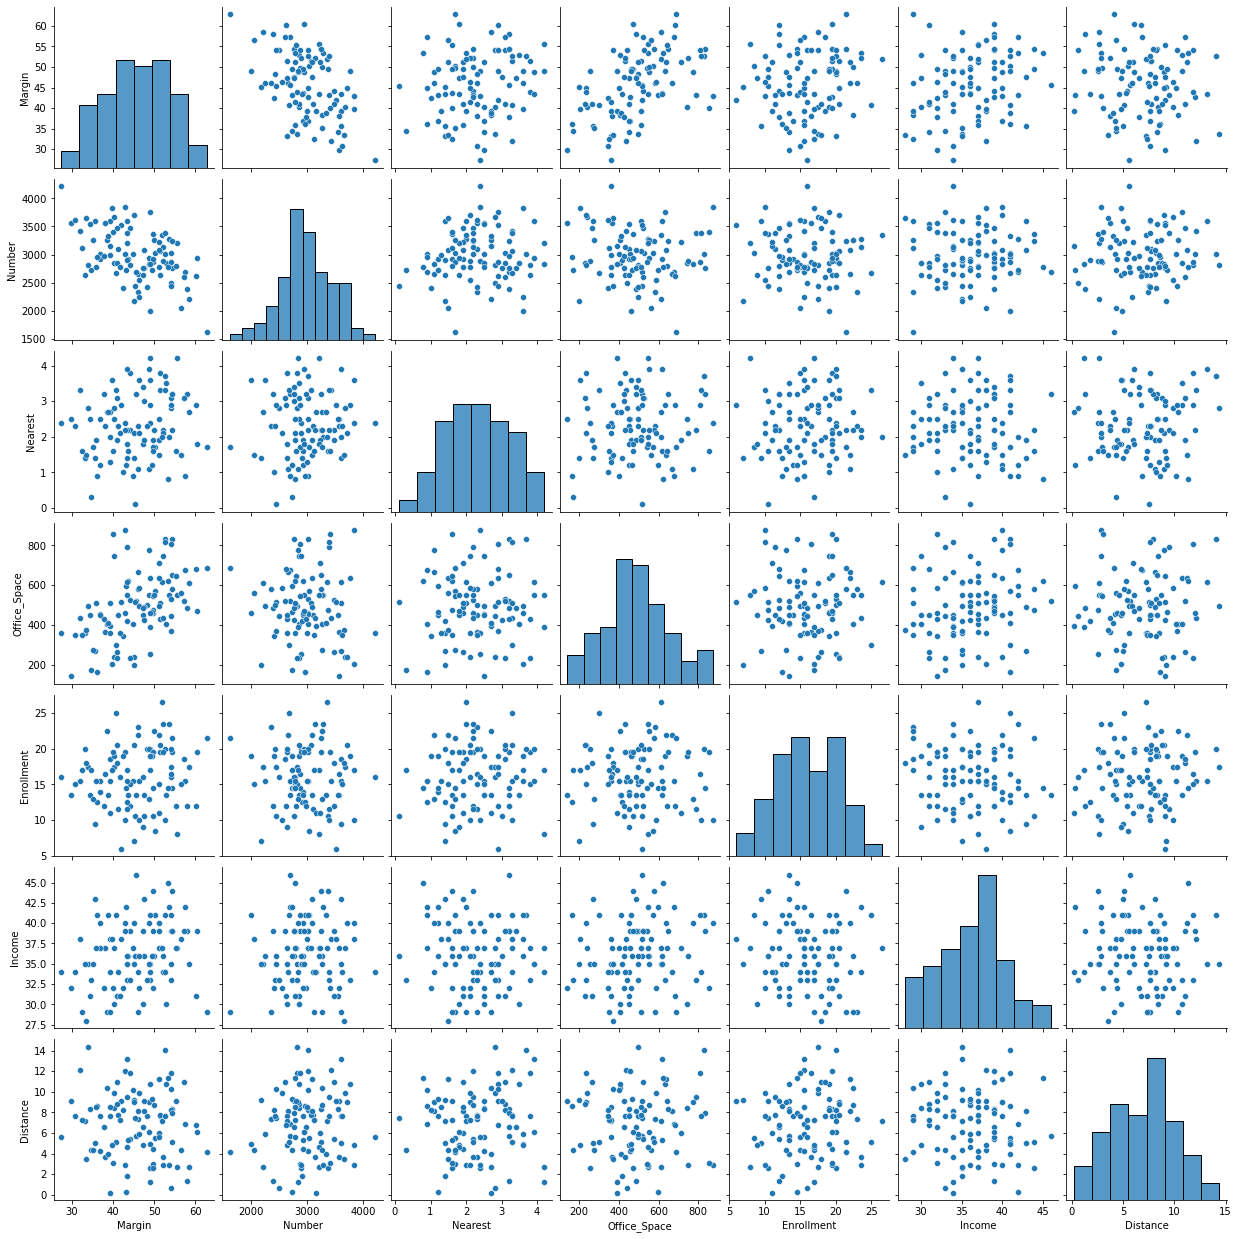

In [15]:
sns.pairplot(data)
plt.show()

In [16]:
data.corr()

,Margin,Number,Nearest,Office_Space,Enrollment,Income,Distance
Margin,1.000000,-0.470329,0.160252,0.501431,0.123012,0.247500,-0.092272
Number,-0.470329,1.000000,0.081680,-0.093475,-0.063908,0.037143,0.073009
Nearest,0.160252,0.081680,1.000000,0.042762,0.071237,-0.045322,0.091287
Office_Space,0.501431,-0.093475,0.042762,1.000000,-0.001030,0.152614,0.032855
Enrollment,0.123012,-0.063908,0.071237,-0.001030,1.000000,-0.112632,0.097324
Income,0.247500,0.037143,-0.045322,0.152614,-0.112632,1.000000,-0.051541
Distance,-0.092272,0.073009,0.091287,0.032855,0.097324,-0.051541,1.000000


Margin과 선형상관관계가 가장 강한 변수: Office_space  
Margin과 선형상관관계가 가장 약한 변수: Distance

b. Margin을 다른 변수들로 설명하는 회귀식을 추정하고 추정된 회귀식을 쓰시오. 

In [17]:
model = smf.ols('Margin~Number+Nearest+Office_Space+Enrollment+Income+Distance',data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Margin   R-squared:                       0.525
Model:                            OLS   Adj. R-squared:                  0.494
Method:                 Least Squares   F-statistic:                     17.14
Date:                Thu, 23 Feb 2023   Prob (F-statistic):           3.03e-13
Time:                        03:26:18   Log-Likelihood:                -308.96
No. Observations:                 100   AIC:                             631.9
Df Residuals:                      93   BIC:                             650.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       38.1386      6.993      5.454      0.000      24.252      52.025
Number          -0.0076      0.001     -6.069      0.000      -0.010      -0.005
Nearest          1.6462      0.633      2.601      0.011       0.390       2.903
Office_Space     0.0198      0.003      5.796      0.000       0.013       0.027
Enrollment       0.2118      0.133      1.587      0.116      -0.053       0.477
Income           0.4131      0.140      2.960      0.004       0.136       0.690
Distance        -0.2253      0.179     -1.260      0.211      -0.580       0.130
==============================================================================
Omnibus:                        1.437   Durbin-Watson:                   2.126
Prob(Omnibus):                  0.487   Jarque-Bera (JB):                1.471
Skew:                          -0.223   Prob(JB):                        0.479
Kurtosis:                       2.607   Cond. No.                     3.88e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.88e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

추정된 회귀식:  
    y = 38.1386 - 0.0076 * Number + 1.6462 * Nearest + 0.0198 * Office_Space + 0.2118 * Enrollment + 0.4131 * Income - 0.2253 * Distance

c. 회귀모형이 유의한지 검정하시오. 즉, Margin과 나머지 변수들 간의 상관관계가 유의한지 검정하시오. (귀무가설, 대립가설, 검정통계량, p-value, 결론 명시)

 회귀모형의 경우, F 통계량이 17.14로서, Prob (F-statistics)를 확인하였을 때, 유의한 회귀 모형임을 확인할 수 있습니다.  
 각각의 회귀 계수의 경우, 귀무가설 H0 는 Beta = 0, 대립가설은 H1 은 Beta != 0, 즉 0 이 아니다로서 설정하여 진행할 경우, t-검정통계량
과, P-value를 확인해유의미한지 검정할 수 있습니다.  
 이 때, intercept부터 Distance까지 검정통계량과 P-value를 확인하였을 시, 유의수준 0.05 보다 P-value가 클 경우 해당 회귀 계수에 대한
검정에 있어서 귀무가설을 기각할 수 없다고 결정할 수 있으며, 작을 경우 대립가설을 채택합니다.  
 intercept와 Number, Nearest, Office_Space, Income 의 경우 0.05보다 작은 P-value가 나타나기 때문에 대립가설을 채택하여 해당 계수가 유
의미하다는 결론을 내릴 수 있습니다.  
 반면에, Enrollment와 Distance의 경우, 각각의 P-value가 0.116과 0.211로 나타나 유의수준 0.05보다 높기 때문에 귀무가설을 기각할 수 없
으며, 계수가 유의미하지 않다는 결론을 내릴 수 있습니다. 이는 해당 회귀계수가 0임을 의미하진 않습니다.  

#### d. 스튜던트화 잔차의 그래프를 그리고 이상치가 있는지 판단하시오. 

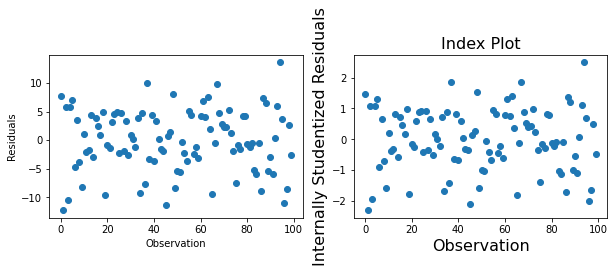

In [18]:
inf = OLSInfluence(model)
# inf3.summary_frame()
fig, ax = plt.subplots(1,2, figsize=(10, 3))
ax[0].scatter(data.index,model.resid)
ax[0].set_xlabel('Observation')
ax[0].set_ylabel('Residuals')
inf.plot_index('resid',threshold=3, ax = ax[1])
plt.show()

스튜어트화 잔차가 3 이상인 경우 이상치로 판단하는데, 해당 데이터의 경우 3 이상인 관측치가 존재하기 때문에, 이상치가 없다고 판단합니다

e. La Quinta Motor Inns는 한 도시에 새로운 모텔을 지으려고 한다. 해당 지역에 대한 조사를 한 결과, 3마일 안에 3815개의 경쟁 모텔의 방이 있고, 가장 가까운 호텔 또는 모텔이 0.9 마일 떨어져 있고, 해당 커뮤니티의 사무실 규모가 476,000ft^2이고, 근처에 두 대학에 24500명의 학생이 등록해있으며, 중위소득이 $35,000 이고 시내중심까지의 거리가 11.2마일이었다. 이 지역에 새로운 모텔을 지었을 때 Margin에 대한  98% 예측구간을 위의 b에서 적합한 모형을 사용하여 구하시오.

In [19]:
pred = model.get_prediction(exog=dict(Number=3815, Nearest=0.9, Office_Space=476, Enrollment=24.5, Income=35, Distance=11.2))
pred.summary_frame(alpha=0.02)

# 예측구간 = (23.149345, 51.033631)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,37.091488,2.075621,32.178254,42.004722,23.149345,51.033631


2.  `webusage.csv` 데이터는 2182명의 인터넷 사용자의 1년간 사용기록과 개인정보를 담고 있다. 변수는 아래와 같다.  총 인터넷 사용시간(T_USAGE)을 성별, 학력, 거주지역으로 설명하는 모형을 만들려고 한다. 아래의 질문에 답하시오.  

|    변수명       |    설명                                     |
|---------------------|-------------------------------------------------|
|    CUS_ID       |  사용자 ID                                |
|    T_USAGE      |  총 사용시간 (초)                          |
|    PAGEVIEWS    |  총 페이지뷰                              |
|    GENDER       |  성별 (여자, 남자)                        |
|    SCHOOL       |  학력 (중졸이하, 고졸, 대졸, 대학원졸)    |
|    LOCATION     |  거주지역 (서울, 그외)                    |


a. 성별은 ‘여자’를, 학력은 ‘중졸이하’를, 거주지역은 ‘그외’를 reference level로 하는 더미변수를 생성하기 위해 각 범주가 가져야 하는 값을 아래의 표에 채우시오.  

| 성별	| Dummy1 |
|--------|--------|
| 여자	|        |
| 남자	|        |


|학력	| Dummy2 |	Dummy3 |	Dummy4|
|----|--------|---------|----------|
|중졸이하	|    |    |    |		
|고졸	    |    |    |    |		
|대졸	    |    |    |    |		
|대학원졸    |    |    |    |			

|거주지역	| Dummy5|
|---------|-------|
|서울      |     |	
|그외	     |     |

In [20]:
data2 = pd.read_csv(data_path + 'webusage.csv')
data2.head()

,Unnamed: 0,CUS_ID,T_USAGE,PAGEVIEWS,GENDER,SCHOOL,LOCATION
0,1,2,836048,25498,여자,대졸,서울
1,2,4,275572,12831,남자,고졸,그외
2,3,8,101640,5871,남자,대졸,그외
3,4,10,1222047,43544,남자,대졸,서울
4,5,11,90562,5582,남자,대학원졸,그외


In [ ]:
# 성별 Dummy1
# 여자   0
# 남자   1

#   학력    Dummy2 Dummy3 Dummy4
# 중졸이하     0       0      0
# 고졸         1       0      0
# 대졸         0       1      0
# 대학원졸     0       0      1

# 거주지역 Dummy5
# 서울       1
# 그외       0

b. 위에서 설계한 바와 동일한 dummy 변수를 포함하는 회귀모형을 적합하여 회귀계수를 추정하고 추정된 회귀식을 쓰시오.

In [21]:
model2 = smf.ols('T_USAGE~C(GENDER, Treatment(reference="여자"))+C(SCHOOL, Treatment(reference="중졸이하"))+C(LOCATION, Treatment(reference="그외"))',data=data2).fit()

In [22]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                T_USAGE   R-squared:                       0.097
Model:                            OLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                     46.62
Date:                Thu, 23 Feb 2023   Prob (F-statistic):           6.71e-46
Time:                        03:29:37   Log-Likelihood:                -31096.
No. Observations:                2182   AIC:                         6.220e+04
Df Residuals:                    2176   BIC:                         6.224e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
Intercept                                       2.557e+05   5.38e+04      4.750      0.000     1.5e+05    3.61e+05
C(GENDER, Treatment(reference="여자"))[T.남자]      6.219e+04   1.66e+04      3.753      0.000    2.97e+04    9.47e+04
C(SCHOOL, Treatment(reference="중졸이하"))[T.고졸]     5.48e+04   5.44e+04      1.008      0.314   -5.19e+04    1.61e+05
C(SCHOOL, Treatment(reference="중졸이하"))[T.대졸]     1.23e+05    5.3e+04      2.321      0.020    1.91e+04    2.27e+05
C(SCHOOL, Treatment(reference="중졸이하"))[T.대학원졸]  1.365e+05   5.65e+04      2.418      0.016    2.58e+04    2.47e+05
C(LOCATION, Treatment(reference="그외"))[T.서울]    2.437e+05   1.64e+04     14.821      0.000    2.11e+05    2.76e+05
==============================================================================
Omnibus:                      876.176   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4788.971
Skew:                           1.825   Prob(JB):                         0.00
Kurtosis:                       9.273   Cond. No.                         18.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# 추정된 회귀식:
#    y = 2.557e+05 + 6.219e+04 * GENDER(남자) + 5.48e+04 * SCHOOL(고졸) + 1.23e+05 * SCHOOL(대졸) + 1.365e+05 * SCHOOL(대학원졸) + 2.437e+05 * LOCATION(서울)
# GENDER(남자) = i번째 사람이 남자인 경우, 여자에 비해 남자의 인터넷 사용 시간이 평균적으로 얼마나 더 큰가?
# SCHOOL(고졸) = i번째 사람이 고졸인 경우, 중졸이하에 비해 고졸의 인터넷 사용 시간이 평균적으로 얼마나 더 큰가?
# SCHOOL(대졸) = i번째 사람이 대졸인 경우, 중졸이하에 비해 대졸의 인터넷 사용 시간이 평균적으로 얼마나 더 큰가?
# SCHOOL(대학원졸) = i번째 사람이 대학원졸인 경우, 중졸이하에 비해 대학원졸의 인터넷 사용 시간이 평균적으로 얼마나 더 큰가?
# LOCATION(서울) = i번째 사람이 서울인 경우, 그외 지역에 비해 서울 지역의 인터넷 사용 시간이 평균적으로 얼마나 더 큰가?

c. 지역과 성별의 교호작용이 유의한가? 교호작용 항의 계수를 사용하여 "서울 여자", "서울 남자", "그외 지역  여자", "그외 지역 남자" 중 T_USAGE의 평균이 가장 높은 그룹이 무엇인지 답하시오.

In [23]:
model2_int = smf.ols('T_USAGE~GENDER+C(SCHOOL)+LOCATION+GENDER*LOCATION',data=data2).fit()
model2_int.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                T_USAGE   R-squared:                       0.105
Model:                            OLS   Adj. R-squared:                  0.103
Method:                 Least Squares   F-statistic:                     42.61
Date:                Thu, 23 Feb 2023   Prob (F-statistic):           2.15e-49
Time:                        03:30:20   Log-Likelihood:                -31086.
No. Observations:                2182   AIC:                         6.219e+04
Df Residuals:                    2175   BIC:                         6.223e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                    3.452e+05      2e+04     17.276      0.000    3.06e+05    3.84e+05
GENDER[T.여자]                 1.712e+04   2.41e+04      0.711      0.477   -3.01e+04    6.43e+04
C(SCHOOL)[T.대졸]              6.837e+04   1.91e+04      3.574      0.000    3.09e+04    1.06e+05
C(SCHOOL)[T.대학원졸]            8.875e+04   2.72e+04      3.262      0.001    3.54e+04    1.42e+05
C(SCHOOL)[T.중졸이하]           -5.094e+04   5.42e+04     -0.941      0.347   -1.57e+05    5.53e+04
LOCATION[T.서울]               3.069e+05   2.15e+04     14.259      0.000    2.65e+05    3.49e+05
GENDER[T.여자]:LOCATION[T.서울] -1.493e+05    3.3e+04     -4.524      0.000   -2.14e+05   -8.46e+04
==============================================================================
Omnibus:                      866.494   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4676.950
Skew:                           1.806   Prob(JB):                         0.00
Kurtosis:                       9.196   Cond. No.                         9.88
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# 지역과 성별의 교호작용은 유의하다. 
# 교호작용 항의 계수는 -1.493e+05 인데, 이는 학력이 일정할 때, 서울 여자의 나머지 그룹과의 평균적인 인터넷 이용 시간의 차이를 나타낸다
# 나머지 비교를 위해 아래 식을 통해, reference level을 변경하여 계수를 확인해보면, 그외 여자의 경우, 1.493e+05가 나오며, 서울 남자는
# 1.493e+05, 그외 남자는 -1.493e+05 가 계수로 나타난다.
# 이를 통해, T_USAGE 의 평균이 가장 높은 그룹은 서울 남자와 그외 여자라고 파악된다.
# 계수가 동일하므로, 개별 계수를 확인해보았을 때 지역이 유의미하다고 나타나기 때문에, 서울 남자의 T_USAGE의 평균이 가장 높다고 판단됩니다

In [24]:
# Reference level을 기준으로, 더미 변수별 계수를 비교하여 구한다. 지역과 성별에 대해, 0과 1을 대입하여 계수들을 비교해서 교호 작용항의
# Reference level과 비교하여 크기의 비교를 진행할 수 있다.
model2_int_2 = smf.ols('T_USAGE~GENDER+C(SCHOOL)+LOCATION+C(GENDER, Treatment(reference="남자"))*C(LOCATION, Treatment(reference="서울"))',data=data2).fit()
model2_int_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                T_USAGE   R-squared:                       0.105
Model:                            OLS   Adj. R-squared:                  0.103
Method:                 Least Squares   F-statistic:                     42.61
Date:                Thu, 23 Feb 2023   Prob (F-statistic):           2.15e-49
Time:                        03:30:48   Log-Likelihood:                -31086.
No. Observations:                2182   AIC:                         6.219e+04
Df Residuals:                    2175   BIC:                         6.223e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================================
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                                3.324e+05   1.15e+04     28.860      0.000     3.1e+05    3.55e+05
GENDER[T.여자]                                                                            -6.609e+04   1.13e+04     -5.845      0.000   -8.83e+04   -4.39e+04
C(SCHOOL)[T.대졸]                                                                          6.837e+04   1.91e+04      3.574      0.000    3.09e+04    1.06e+05
C(SCHOOL)[T.대학원졸]                                                                        8.875e+04   2.72e+04      3.262      0.001    3.54e+04    1.42e+05
C(SCHOOL)[T.중졸이하]                                                                       -5.094e+04   5.42e+04     -0.941      0.347   -1.57e+05    5.53e+04
LOCATION[T.서울]                                                                           3.197e+05   1.24e+04     25.756      0.000    2.95e+05    3.44e+05
C(GENDER, Treatment(reference="남자"))[T.여자]                                              -6.609e+04   1.13e+04     -5.845      0.000   -8.83e+04   -4.39e+04
C(LOCATION, Treatment(reference="서울"))[T.그외]                                             1.275e+04    1.2e+04      1.062      0.288   -1.08e+04    3.63e+04
C(GENDER, Treatment(reference="남자"))[T.여자]:C(LOCATION, Treatment(reference="서울"))[T.그외]  1.493e+05    3.3e+04      4.524      0.000    8.46e+04    2.14e+05
==============================================================================
Omnibus:                      866.494   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4676.950
Skew:                           1.806   Prob(JB):                         0.00
Kurtosis:                       9.196   Cond. No.                     3.10e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.5e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [25]:
model2_int_3 = smf.ols('T_USAGE~GENDER+C(SCHOOL)+LOCATION+C(GENDER, Treatment(reference="여자"))*C(LOCATION, Treatment(reference="그외"))',data=data2).fit()
model2_int_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                T_USAGE   R-squared:                       0.105
Model:                            OLS   Adj. R-squared:                  0.103
Method:                 Least Squares   F-statistic:                     42.61
Date:                Thu, 23 Feb 2023   Prob (F-statistic):           2.15e-49
Time:                        03:30:54   Log-Likelihood:                -31086.
No. Observations:                2182   AIC:                         6.219e+04
Df Residuals:                    2175   BIC:                         6.223e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================================
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                                2.358e+05   1.26e+04     18.717      0.000    2.11e+05    2.61e+05
GENDER[T.여자]                                                                             1.265e+05   1.48e+04      8.550      0.000    9.75e+04    1.55e+05
C(SCHOOL)[T.대졸]                                                                          6.837e+04   1.91e+04      3.574      0.000    3.09e+04    1.06e+05
C(SCHOOL)[T.대학원졸]                                                                        8.875e+04   2.72e+04      3.262      0.001    3.54e+04    1.42e+05
C(SCHOOL)[T.중졸이하]                                                                       -5.094e+04   5.42e+04     -0.941      0.347   -1.57e+05    5.53e+04
LOCATION[T.서울]                                                                           7.881e+04   1.25e+04      6.281      0.000    5.42e+04    1.03e+05
C(GENDER, Treatment(reference="여자"))[T.남자]                                               1.093e+05   1.23e+04      8.921      0.000    8.53e+04    1.33e+05
C(LOCATION, Treatment(reference="그외"))[T.서울]                                             7.881e+04   1.25e+04      6.281      0.000    5.42e+04    1.03e+05
C(GENDER, Treatment(reference="여자"))[T.남자]:C(LOCATION, Treatment(reference="그외"))[T.서울]  1.493e+05    3.3e+04      4.524      0.000    8.46e+04    2.14e+05
==============================================================================
Omnibus:                      866.494   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4676.950
Skew:                           1.806   Prob(JB):                         0.00
Kurtosis:                       9.196   Cond. No.                     7.39e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.04e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [26]:
model2_int_4 = smf.ols('T_USAGE~GENDER+C(SCHOOL)+LOCATION+C(GENDER, Treatment(reference="여자"))*C(LOCATION, Treatment(reference="서울"))',data=data2).fit()
model2_int_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                T_USAGE   R-squared:                       0.105
Model:                            OLS   Adj. R-squared:                  0.103
Method:                 Least Squares   F-statistic:                     42.61
Date:                Thu, 23 Feb 2023   Prob (F-statistic):           2.15e-49
Time:                        03:31:01   Log-Likelihood:                -31086.
No. Observations:                2182   AIC:                         6.219e+04
Df Residuals:                    2175   BIC:                         6.223e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================================
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                                2.536e+05   9380.366     27.033      0.000    2.35e+05    2.72e+05
GENDER[T.여자]                                                                              6.07e+04   1.09e+04      5.547      0.000    3.92e+04    8.22e+04
C(SCHOOL)[T.대졸]                                                                          6.837e+04   1.91e+04      3.574      0.000    3.09e+04    1.06e+05
C(SCHOOL)[T.대학원졸]                                                                        8.875e+04   2.72e+04      3.262      0.001    3.54e+04    1.42e+05
C(SCHOOL)[T.중졸이하]                                                                       -5.094e+04   5.42e+04     -0.941      0.347   -1.57e+05    5.53e+04
LOCATION[T.서울]                                                                           2.056e+05   1.13e+04     18.212      0.000    1.83e+05    2.28e+05
C(GENDER, Treatment(reference="여자"))[T.남자]                                               1.929e+05   1.34e+04     14.378      0.000    1.67e+05    2.19e+05
C(LOCATION, Treatment(reference="서울"))[T.그외]                                             4.798e+04   1.52e+04      3.154      0.002    1.81e+04    7.78e+04
C(GENDER, Treatment(reference="여자"))[T.남자]:C(LOCATION, Treatment(reference="서울"))[T.그외] -1.493e+05    3.3e+04     -4.524      0.000   -2.14e+05   -8.46e+04
==============================================================================
Omnibus:                      866.494   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4676.950
Skew:                           1.806   Prob(JB):                         0.00
Kurtosis:                       9.196   Cond. No.                     3.03e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.05e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

3.	한 연구자는 대학원 지원자의 GRE(graduate record exam; gre) 점수, 학점(gpa), 학부 졸업대학의 랭킹(rank)이 합격여부(admit=1:합격, 0:불합격)에 미치는 영향을 알아보고자 한다. `admission.csv`파일에 데이터가 저장되어 있다.

a.  admit을 종속변수로, 나머지 변수들을 설명변수로 하는 로지스틱 회귀모형을 적합하고 그 결과물(`.summary()`)을 프린트 하시오. 

In [27]:
data3 = pd.read_csv(data_path + 'admission.csv')
data3.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [28]:
model3 = smf.glm('admit~gre+gpa+C(rank)', data = data3, family = sm.families.Binomial()).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  admit   No. Observations:                  400
Model:                            GLM   Df Residuals:                      394
Model Family:                Binomial   Df Model:                            5
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -229.26
Date:                Thu, 23 Feb 2023   Deviance:                       458.52
Time:                        03:32:00   Pearson chi2:                     397.
No. Iterations:                     4   Pseudo R-squ. (CS):            0.09846
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -3.9900      1.140     -3.500      0.000      -6.224      -1.756
C(rank)[T.2]    -0.6754      0.316     -2.134      0.033      -1.296      -0.055
C(rank)[T.3]    -1.3402      0.345     -3.881      0.000      -2.017      -0.663
C(rank)[T.4]    -1.5515      0.418     -3.713      0.000      -2.370      -0.733
gre              0.0023      0.001      2.070      0.038       0.000       0.004
gpa              0.8040      0.332      2.423      0.015       0.154       1.454
================================================================================
"""

b. 이미 GRE점수를 받아놓은 한 지원자가 있다. 현재 학점이 3.5인데 계절학기 재수강을 하면 학점을 3.7로 올릴 수 있다. 만일 학점을 3.7로 올린다면 이 학생이 합격할 odds는 몇 % 상승하는가?

In [29]:
import numpy as np
np.exp(model3.params[5]*0.2)

# odds = 17.44% 상승

1.174458875296207

c. 만일 학점과 GRE점수가 동일한 두 학생이 각기 rank1 의 대학과 rank2의 대학을 졸업했다고 하자. Rank1에 속한 대학을 졸업한 학생에 비해 rank2에 속한 대학을 졸업한 학생의 합격 odds는 몇 % 감소하는가?

In [30]:
np.exp(model3.params[1])
# odds = 49.1% 감소

0.508930950928135

d.  rank1대학을 졸업하고 gre가 600점, gpa가 3.5인 학생의 합격확률을 계산하시오.

In [31]:
pred_2 = model3.get_prediction(exog=dict(gre=600, gpa=3.5, rank=1))
pred_2.summary_frame(alpha=0.05)
# 합격 확률 = 54.55%

# model3.summary().tables[1]
# logodds = -3.9900 + 0.0023*600 + 0.8040*3.5
# np.exp(logodds)/(1+np.exp(logodds))

,mean,mean_se,mean_ci_lower,mean_ci_upper
0,0.545575,0.065822,0.416404,0.66889


### Final Exam

1. 두 개의 변수 x1, x2의 공분산 행렬이 아래와 같다. 
$$ \Sigma = \begin{bmatrix}
3&2\\
2&3
\end{bmatrix}$$  
(a)  spectral decomposition을 통해 $\Sigma$의 고유값과 고유벡터를 구하시오. 

(b) x1과 x2에 대해 주성분 분석을 수행하면 구해지는  첫 번째 주성분 PC1을 x1과 x2의 선형결합으로 표현하시오. (위의 (a)의 결과를 활용)

In [32]:
X_1 = np.array([[3,2],[2,3]])
pca_1 = PCA().fit(X_1)

np.matmul(X_1, pca_1.components_[0])

array([-0.70710678,  0.70710678])

In [33]:
pca_1.components_[0]

array([-0.70710678,  0.70710678])

(c) 위의 (b)에서 구한 PC1은 총 분산의 몇 %를 설명하는가? 

In [34]:
pca_1.explained_variance_ratio_

array([1., 0.])

In [35]:
pca_1.explained_variance_

array([1., 0.])

2. 군집분석에 대한 다음의 서술에 대해 True/False를 구분하고 False인 경우 그 이유를 설명하시오.  

(a) K-means clustering은 시행할 때마다 동일한 군집결과를 얻는다. 

In [37]:
False
# K-means clustering 은 initial seed 나 Partition 이 어떻게 결정되는가에 따라, 시작 seed 의 위치가 
# 바뀌고, 그에 따른 할당 seed가 바뀌기 때문에 시행할 때마다 군집결과가 달라진다

False

(b) Linkage clustering은 시행할 때마다 동일한 군집결과를 얻는다.


In [38]:
True

True

(c) Linkage clustering은 군집 개수를 사전에 설정해야 한다. 

In [39]:
False
# Linkage clustering은 군집에 속한 관측치들 사이의 거리 조합에 따라 거리를 정의해 군집을 형성하기 때문에
# 최소 군집부터 전체 데이터까지 군집이 확장되며, 명확한 정답이 없기 때문에 탐색적으로 군집 개수를 정해야 한다

False

(d) DBSCAN은 군집 개수를 사전에 설정해야 한다. 

In [40]:
False
# DBSCAN은 사전에 eps와 min_sample만을 정의하며, Core sample을 형성할 때의 반경과 최소 포인트의 개수이다.
# 따라서, 실행의 결과에 따라 클러스터의 개수는 자동으로 선택된다

False

(e) Gaussian mixture model에 기반한 clustering은 BIC를 기준으로 최적의 군집개수와 공분산 행렬의 형태를 결정할 수 있다. 

In [41]:
True

True

3. `College30.csv` 데이터셋은 1995년 US News와 World Report에 수록된 30개 대학교에 대한 기록을 포함하고 있다. 한 교육부 관계자는 아래의 변수들을 사용하여 각 대학의 특성을 파악하고자 한다. 
  

|변수명   |내용   |
|---|---|
|Top10perc|	고교성적 상위 10% 학생의 비율|
|Personal|	개인 지출|
|S.F.Ratio|	교수 1인당 학생 비율|
|perc.alumni|	졸업생 기부 비율|
|Expend|	학생 1인당 교육지출|
|Grad.Rate|	졸업률|
|Acc_rate|	대입 합격자 수 / 대입 지원자 수 |
|Enrl_rate|	등록 신입생 수 / 대입 합격자 수 |




(a) 데이터를 표준화 한 후 8개의 변수를 사용하여 PCA 분석을 수행하고 각 주성분이 설명하는 총 분산의 비율을 프린트 하시오. 

In [42]:
data = pd.read_csv(data_path + 'College30.csv')
data.head()

,Unnamed: 0,Top10perc,Personal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Acc_rate,Enrl_rate
0,Princeton University,90,1575,8.4,54,28320,99,0.154486,0.564643
1,Harvard University,90,1920,9.9,52,37219,100,0.156149,0.741801
2,Yale University,95,2115,5.8,49,40386,99,0.229145,0.536894
3,Amherst College,83,1598,8.4,63,21424,100,0.230590,0.421371
4,Brown University,87,1100,7.6,39,20440,97,0.257349,0.451374


In [43]:
X = data.iloc[:,1:]
X.head()

,Top10perc,Personal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Acc_rate,Enrl_rate
0,90,1575,8.4,54,28320,99,0.154486,0.564643
1,90,1920,9.9,52,37219,100,0.156149,0.741801
2,95,2115,5.8,49,40386,99,0.229145,0.536894
3,83,1598,8.4,63,21424,100,0.230590,0.421371
4,87,1100,7.6,39,20440,97,0.257349,0.451374


In [44]:
X_scale = StandardScaler().fit_transform(X)
pca=PCA().fit(X_scale)

In [45]:
pca.explained_variance_ratio_

array([0.47364012, 0.19555032, 0.12525279, 0.09590205, 0.04219235,
       0.03950054, 0.02140291, 0.00655891])

(b) 아래의 두 가지 기준에 의해 적절한 축소 차원의 수를 결정하시오.  
(b-1) 주성분이 설명하는 총 설명의 비율이 70% 이상이 되는 최소 차원 

In [46]:
np.cumsum(pca.explained_variance_ratio_)
# 축소 차원의 수: 3

array([0.47364012, 0.66919044, 0.79444323, 0.89034528, 0.93253763,
       0.97203817, 0.99344109, 1.        ])

(b-2) 고유값이 1 이하인 주성분을 제외

In [47]:
pca.explained_variance_
# 축소 차원의 수: 3

array([3.91978029, 1.6183475 , 1.03657479, 0.79367212, 0.34917809,
       0.32690105, 0.17712756, 0.05428066])

(c) 첫 두 개의 주성분을 사용하여 행렬도(biplot)을 그리시오. (대학 이름을 함께 프린트) 

In [48]:
x_reduced = pca.transform(X_scale)

In [49]:
def biplot(score,coeff, labels=None, index = X.index):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley,s=5)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'green', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
    for i in range(score.shape[0]):
        if index is None:
            plt.text((xs * scalex)[i] , (ys * scaley)[i], str(i))
        else:
            plt.text((xs * scalex)[i] , (ys * scaley)[i], index[i])

    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

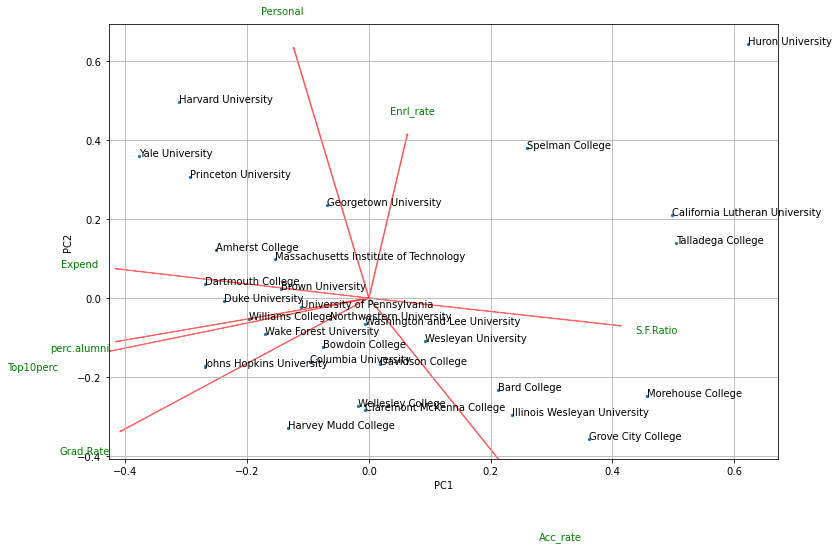

In [50]:
plt.figure(figsize=(12,8))
biplot(x_reduced[:,0:2],np.transpose(pca.components_[0:2, :]), X.columns, index = data['Unnamed: 0'])

(d) 행렬도를 통해 Harvard University와 Huron University의 특성을 원변수 차원에서 비교하여 설명하시오. 

In [51]:
# Huron University는 PC1과 PC2 양쪽 관점에서 모두 양의 상관관계 보여주는 변수들의 값이 높다. 그렇기 때문에, 
# SF. Ratio와 Acc_rate, Enri_rate, Personal에서 높은 기록을 보여준다.
# 반면에, Harvard University는 PC2와의 양의 상관관계를 갖지만, PC1과는 음의 상관관계를 보여주는 변수들의 값이 높
# 다. 그렇기 때문에,원변수 차원에서 기록을 살펴보자면, Personal 과 Enri_rate는 Huron University와 마찬가지로 높은
# 기록을 보여주지만,PC1 과 수평인 변수들 중 Hurno University와 반대로, Expend, perc.alumni, Top10perc, GrandRate
# 가 높은 기록을 보여준다.

(e) 첫 두 개의 주성분 점수를 활용하여 ward's method로 군집분석을 실시하고 dendrogram을 프린트하시오. 

In [52]:
data_clustering = x_reduced[:,0:2]
data_clustering

array([[-2.1334579 ,  1.52192543],
       [-2.25690442,  2.46370393],
       [-2.73659023,  1.79300785],
       [-1.82465302,  0.61042167],
       [-1.05101596,  0.11905663],
       [-0.49461916,  1.17328025],
       [-1.94921678,  0.17520846],
       [-1.73078664, -0.04299074],
       [-0.70540491, -0.80413626],
       [-1.43194106, -0.26615094],
       [-0.54985389, -0.6204092 ],
       [ 4.51093921,  3.2000703 ],
       [-0.05226604, -0.33055977],
       [ 1.88538495,  1.8836993 ],
       [-1.11560718,  0.48940886],
       [ 3.65569455,  0.68957862],
       [ 0.128106  , -0.83245982],
       [-1.95610506, -0.85224913],
       [-0.04331503, -1.40540368],
       [ 0.66686494, -0.53714948],
       [-0.96087696, -1.63999494],
       [-0.80560958, -0.11023686],
       [-1.23358482, -0.45230751],
       [-0.46219332, -0.25826767],
       [-0.12704628, -1.36431573],
       [ 3.61262626,  1.04573497],
       [ 1.53825067, -1.16264223],
       [ 1.69893383, -1.47591071],
       [ 2.61895207,

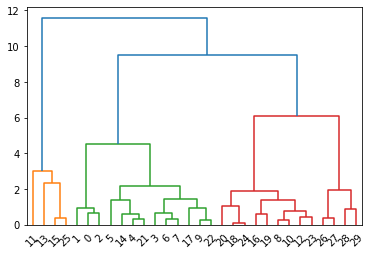

In [53]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree
clust_ward = linkage(data_clustering, method='ward')

dendrogram(clust_ward)
plt.show()

4. 한 항공사의 고객만족도 설문조사 결과를 사용하여 Exploratory Factor Analysis를 진행한 결과 아래와 같은 요인적재행렬(factor loading matrix)을 얻었다. (표준화 된 변수에 대해 분석을 수행한 결과임)
  

|    |Factor 1|Factor 2| Factor 3|
|----|--------|--------|---------|
|Great hospitatliy| 0.98| -0.04|0.02|
|Flight is on time| 0.95|-0.01|0.18|
|Great Food|0.92|0.04|-0.05|
|Friendly atmosphere|0.62|0.17|-0.33|
|Frequently flyer program|-0.03|0.97|-0.01|
|Flights are economic|-0.02|0.96|0.09|
|No hassles in boarding|-0.07|0.95|0.09|
|Good flight times| -0.09|0.19|0.96|
|Seats are comfortable|0.03|0.09|0.95|
|Loyalty or attachment|-0.19|-0.42|-0.09|

(a) Factor1으로부터 상대적으로 큰 영향을 받는 변수들을 나열하시

In [ ]:
# Great hospitatliy
# Flight is on time
# Great Food
# Friendly atmosphere

(b) Great hospitality의 분산 중 3개의 Factor가 설명하는 분산의 비율을 구하시오. 

In [55]:
(0.98)**2 + (-0.04)**2 + (0.02)**2
# 96.24%

0.9623999999999999